# freqdemod-quickstart-1

### Author information

John A. Marohn (jam99@cornell.edu)  
Department of Chemistry and Chemical Biology  
Cornell University  
Ithaca, NY USA; 14853-1301

### Date

2014/11/23.  Revised 2023/05/08.

### Abstract

Create a sine wave with noise and demodulate it to obtains the sine wave's frequency.

# Preliminaries

So we can import the package in the usual way, use ``setup.py`` development mode.  Here we are following directions [here](https://pythonhosted.org/setuptools/setuptools.html#development-mode).  In the base directory, run: 

    python setup.py develop
    
We should now be able to import parts of the package in the usual way using an import statement

In [1]:
import freqdemod as fd
from freqdemod.demodulate import Signal

In [2]:
from freqdemod import Signal

Execute the the first line below if you want the plots to show inline.  If instead you want each plot to display in a separate pop-up window, then don't execute the first line.  Set up plotting defaults so the plots will look nice inline: 

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 8, 6

In [4]:
import matplotlib
print(matplotlib.__version__)

3.7.1


## Create a test signal

The test signal is a sine wave with noise added.

In [5]:
fd = 50.0e3    # digitization frequency
f0 = 2.00e3    # signal frequency
nt = 60e3      # number of signal points    
sn = 1.0       # signal zero-to-peak amplitude
sn_rms = 0.01  # noise rms amplitude

dt = 1 / fd
t = dt * np.arange(nt)
signal = sn * np.sin(2*np.pi*f0*t) + np.random.normal(0, sn_rms, t.size)

Plot the test signal

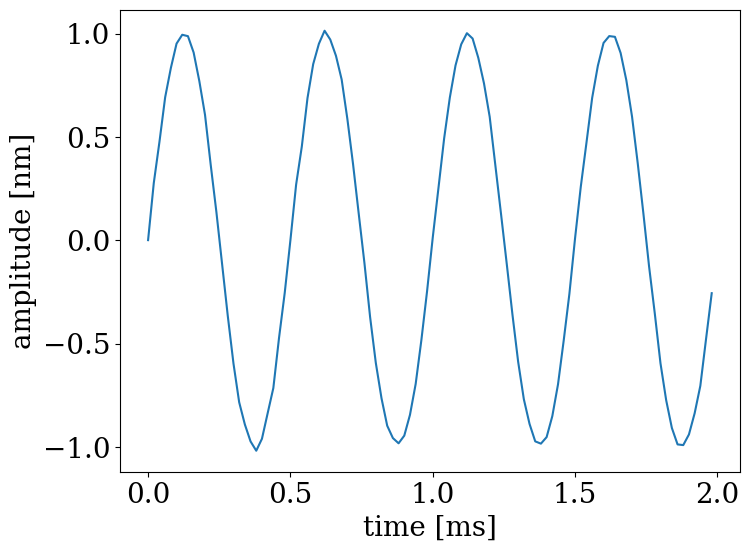

In [6]:
plt.plot(1E3*t[0:100], signal[0:100])
plt.xlabel('time [ms]')
plt.ylabel('amplitude [nm]')
plt.show()

## Load the test signal into a Signal object

### Create an instance of the Signal object


In [7]:
s = Signal()     # Create a signal
s.load_nparray(signal,"x","nm",dt)   # Load the data into the file

### Process the Signal object

Open the Signal file and process it.

In [8]:
s.time_mask_binarate("middle")  # Pull out the middle section
s.time_window_cyclicize(3E-3)   # Force the data to start and end at zero
s.fft()                         # Fourier transform the data
s.freq_filter_Hilbert_complex() # Take the complex Hilbert transform
s.freq_filter_bp(1.00)          # Apply a 1 kHz wide bandpass filter
s.time_mask_rippleless(15E-3)   # Set up a filter to remove ripple
s.ifft()                        # Inverse Fourier transform the data
s.fit_phase(221.34E-6)          # Fit the phase vs time data

### Plot the intermediate results

Decide wheter to plot using LaTeX axes labels.  Using ``latex=True`` may make plotting very slow, so I suggest using ``latex=False`` to start.

In [9]:
latex = False

Begin by re-plotting the data

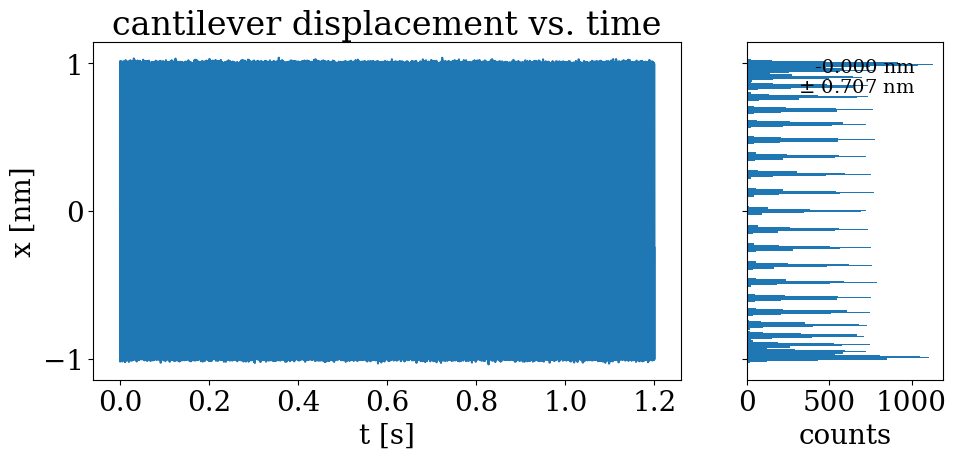

In [10]:
s.plot('y', LaTeX=latex)

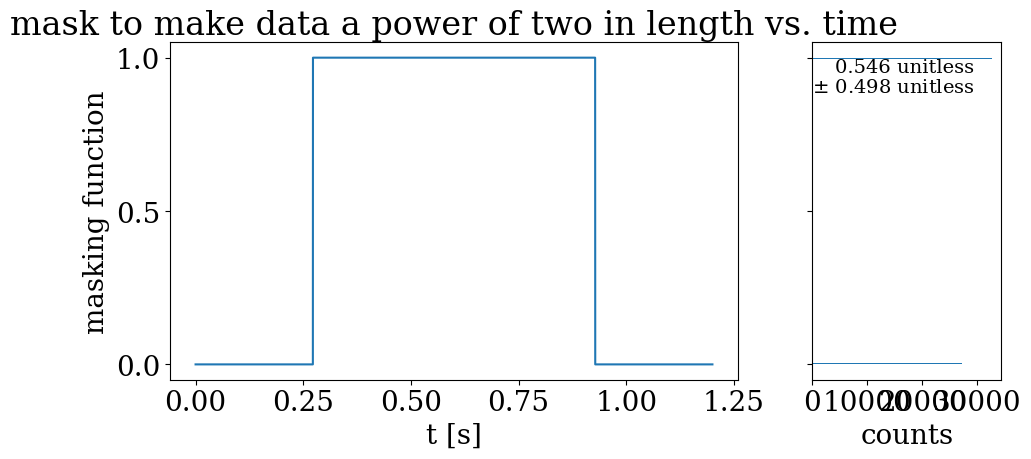

In [14]:
s.plot('workup/time/mask/binarate', LaTeX=latex)

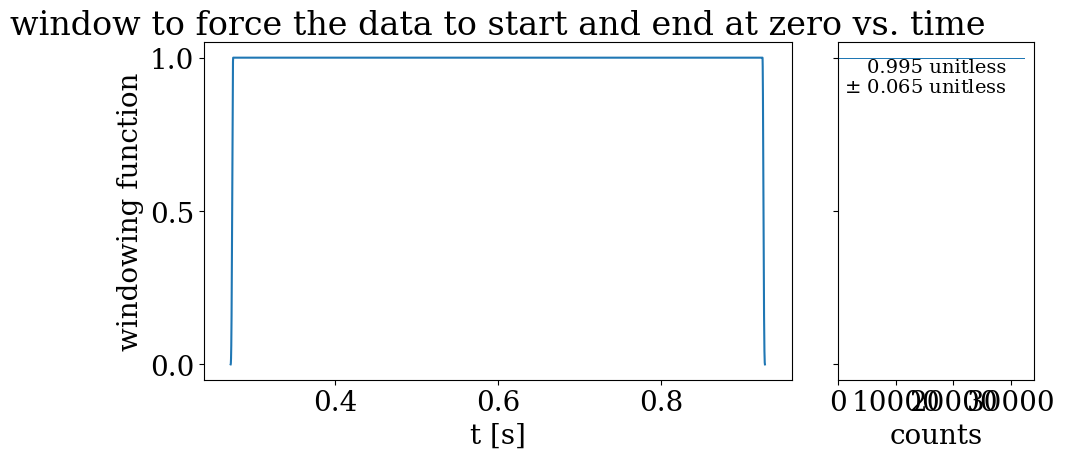

In [15]:
s.plot('workup/time/window/cyclicize', LaTeX=latex) 

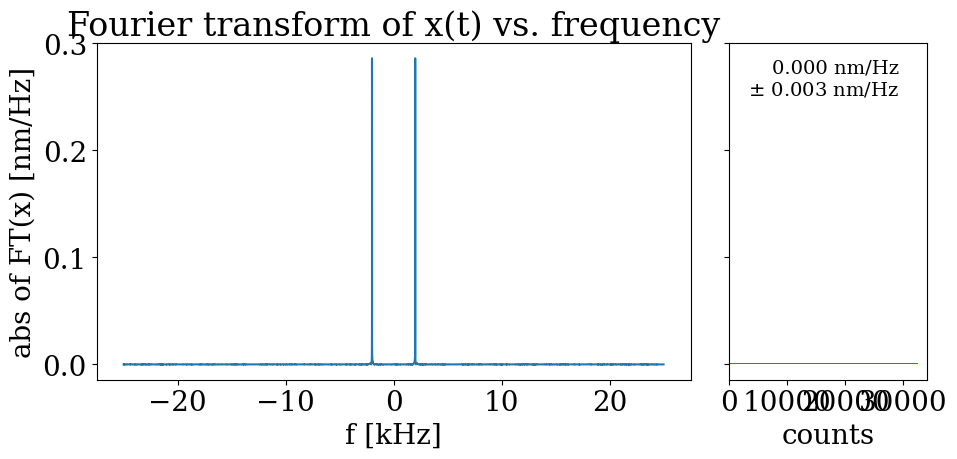

In [16]:
s.plot('workup/freq/FT', LaTeX=latex, component='abs')

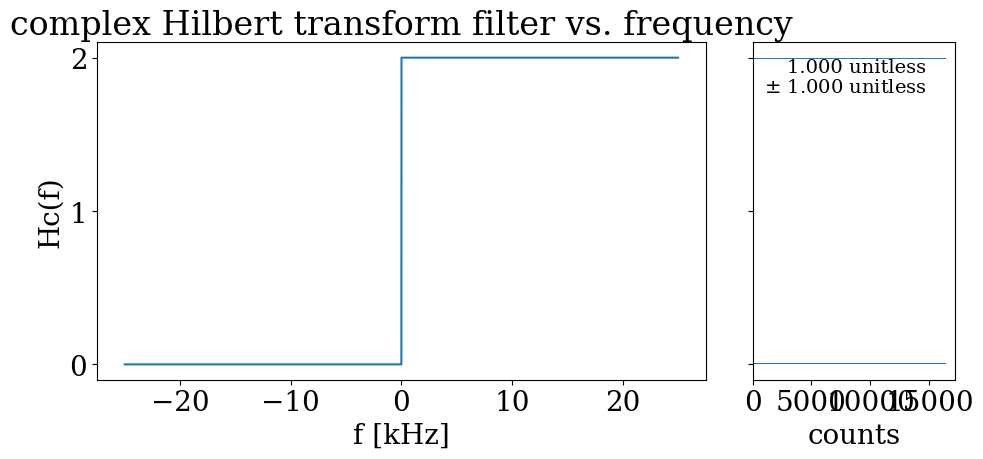

In [17]:
s.plot('workup/freq/filter/Hc', LaTeX=latex)

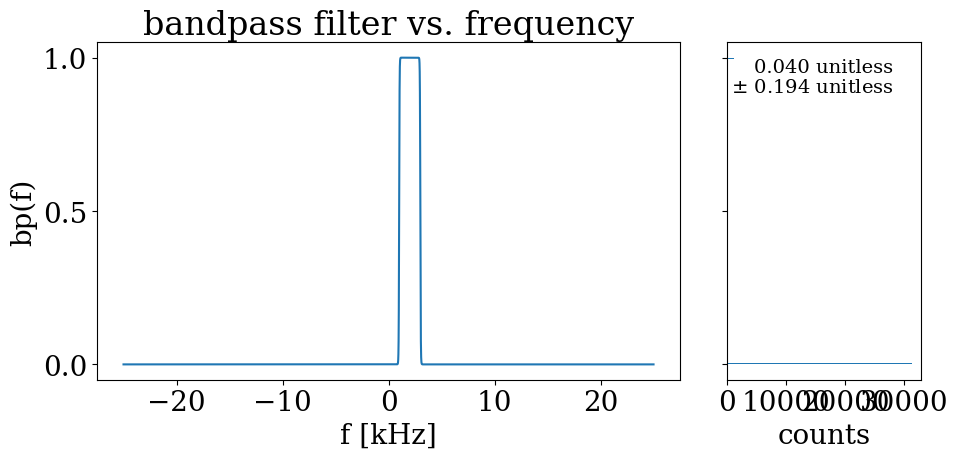

In [18]:
s.plot('workup/freq/filter/bp', LaTeX=latex)

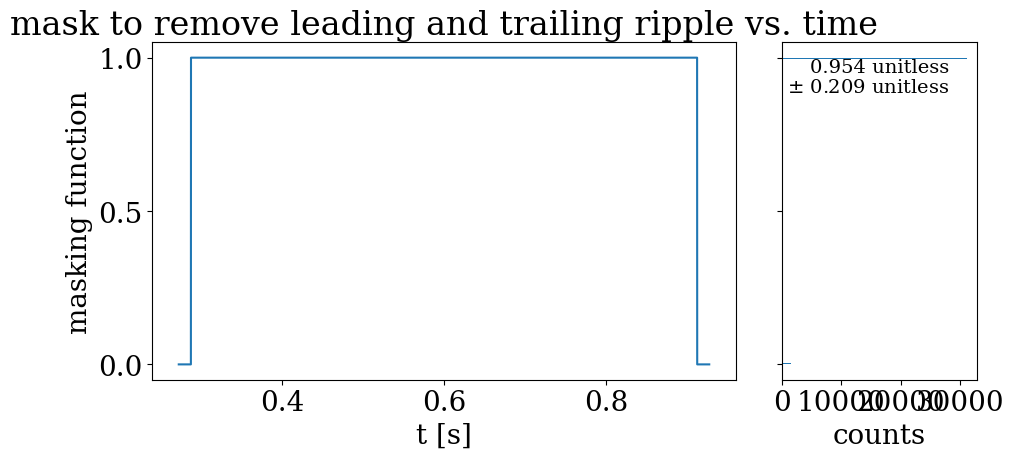

In [19]:
s.plot('workup/time/mask/rippleless', LaTeX=latex)

### Summarize the data workup

The signal object creates a comment which summarizes the data workup.  Print out this comment.

In [20]:
print(s)


Signal report
* HDF5 file 193431-2df78e.h5 created in core memory

* Add a signal x[nm] of length 60000, time step 20.000 us, and duration 1.200 s

* Make an array, workup/time/mask/binarate, to be used to truncate the signal to be 32768 points long (a power of two). The truncated array will start at point 13616 and stop before point 46384.

* Create a windowing function, workup/time/window/cyclicize, with a rising/falling blackman filter having a rise/fall time of 3000.000 us (150 points).

* Fourier transform the windowed signal. It took 16.5 ms to compute the FFT.

* Create the complex Hilbert transform filter.

* Create a bandpass filter with center frequency = 2.000427 kHz, bandwidth = 1.000 kHz, and order = 50. Best estimate of the resonance frequency = 1.996838 kHz.

* Make an array, workup/time/mask/rippleless, to be used to remove leading and trailing ripple.  The dead time is 15000.000 us.

* Apply an inverse Fourier transform.

* Curve fit the phase data. The target chunk d

### Plot the primary results

... including the complex signal, the amplitude, the phase, and the frequency.

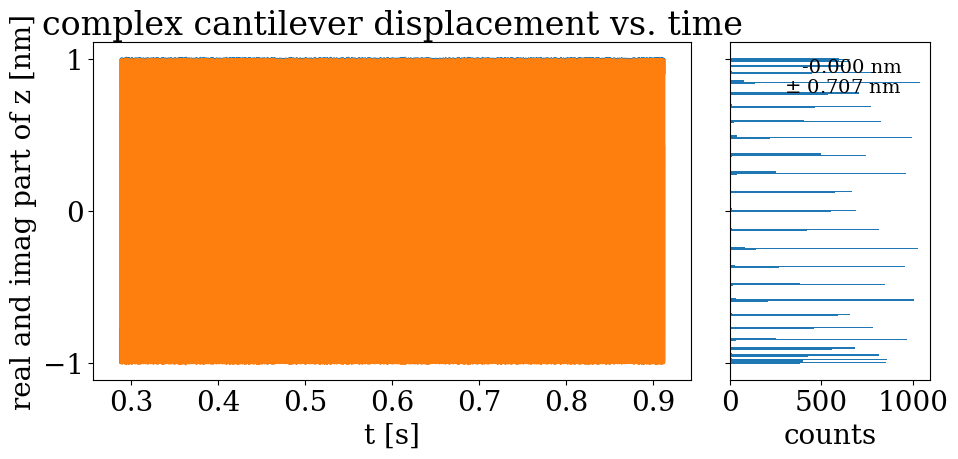

In [21]:
s.plot('workup/time/z', LaTeX=latex, component='both')

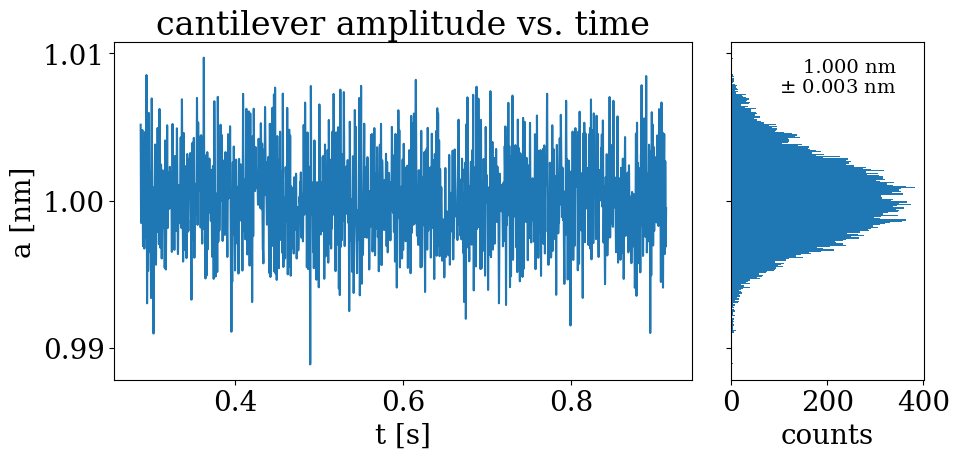

In [22]:
s.plot('workup/time/a', LaTeX=latex)

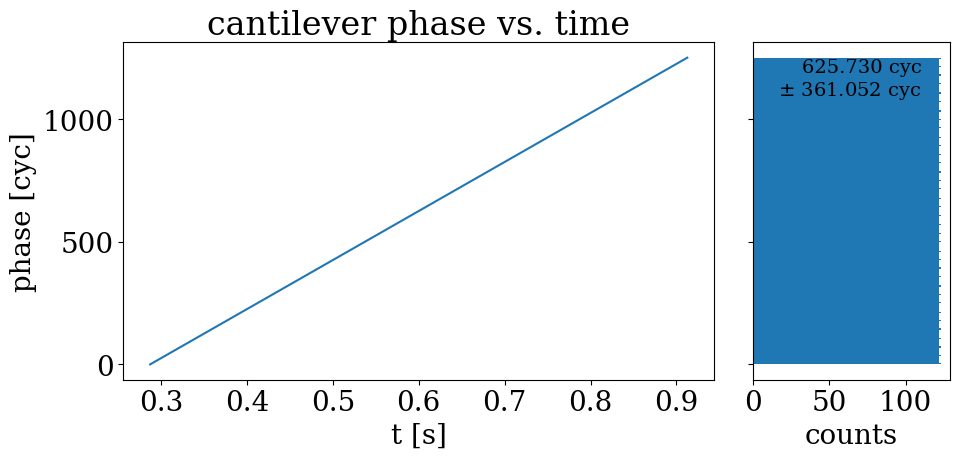

In [23]:
s.plot('workup/time/p', LaTeX=latex)

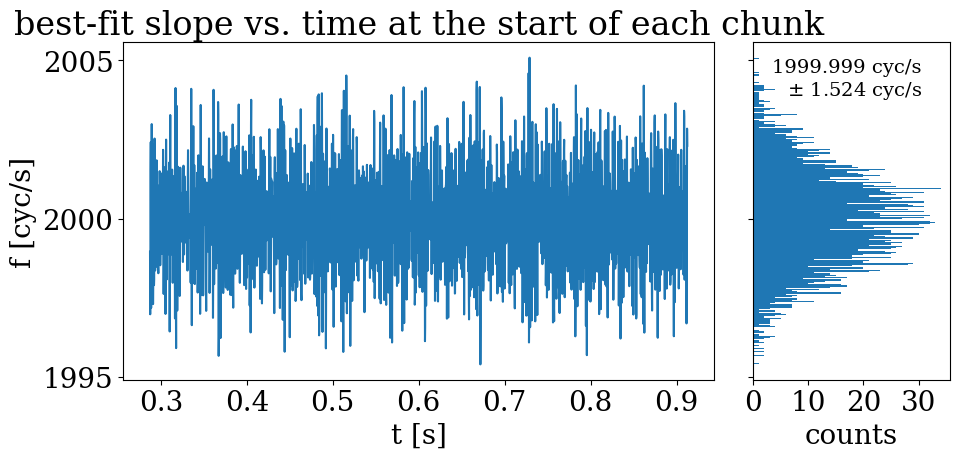

In [24]:
s.plot('workup/fit/y', LaTeX=latex)

## Explore the Signal object

In [25]:
s.list()


Signal file summary
<HDF5 file "193431-2df78e.h5" (mode r+)>
    /workup
        /workup/fit
            /workup/fit/x  (2842,)  <f8
            /workup/fit/y  (2842,)  <f8
        /workup/freq
            /workup/freq/FT  (32768,)  <c16
            /workup/freq/filter
                /workup/freq/filter/Hc  (32768,)  <f8
                /workup/freq/filter/bp  (32768,)  <f8
            /workup/freq/freq  (32768,)  <f8
        /workup/time
            /workup/time/a  (31268,)  <f8
            /workup/time/mask
                /workup/time/mask/binarate  (60000,)  |b1
                /workup/time/mask/rippleless  (32768,)  |b1
            /workup/time/p  (31268,)  <f8
            /workup/time/window
                /workup/time/window/cyclicize  (32768,)  <f8
            /workup/time/x_binarated  (32768,)  <f8
            /workup/time/x_rippleless  (31268,)  <f8
            /workup/time/z  (31268,)  <c16
    /x  (60000,)  <f8
    /y  (60000,)  <f8


## Clean up

Close the signal file.

In [26]:
s.close()